In [1]:
import pandas as pd 

In [2]:
import pandas as pd

file_path = r"C:\Data_for_learning_overall\data_machine_learning\titanic survive rate\titanic.csv"
df = pd.read_csv(file_path)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
columns_to_drop = ["PassengerId", "Name", "SibSp", "Parch", "Ticket", "Cabin", "Embarked"]
df1 = df.drop(columns=columns_to_drop)
df1

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500
...,...,...,...,...,...
886,0,2,male,27.0,13.0000
887,1,1,female,19.0,30.0000
888,0,3,female,NaN,23.4500
889,1,1,male,26.0,30.0000


In [4]:
df1 = pd.get_dummies(df1, columns=['Sex'], drop_first=True)

In [5]:
from sklearn.model_selection import train_test_split

X = df1[['Pclass', 'Age', 'Fare', 'Sex_male']]
y = df1['Survived']

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
from sklearn.tree import DecisionTreeClassifier

# Assuming X_train, X_test, y_train, y_test are already defined
model = DecisionTreeClassifier()
model.fit(X_train, y_train)


DecisionTreeClassifier()

In [10]:
from sklearn.metrics import accuracy_score

# Assuming model is already trained
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')




Accuracy: 0.80


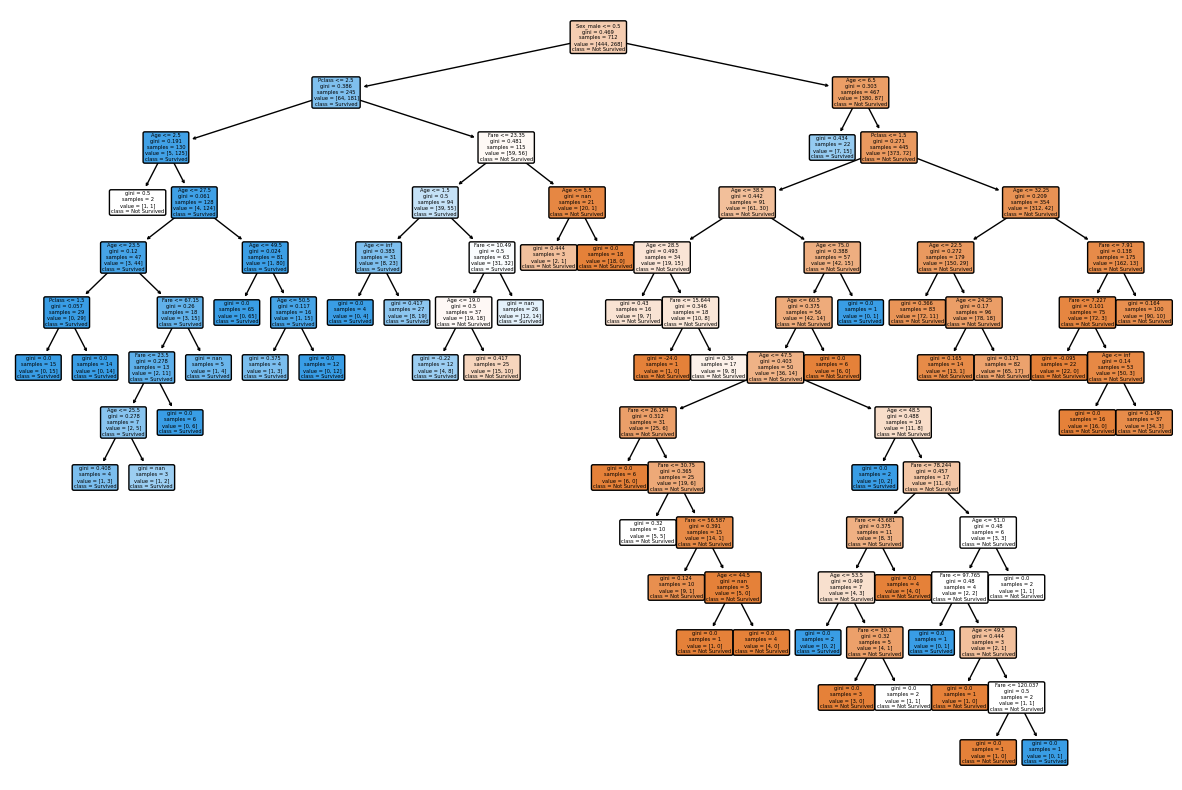

In [12]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

#decision tree model
plt.figure(figsize=(15, 10))
plot_tree(model, feature_names=list(X.columns), class_names=['Not Survived', 'Survived'], filled=True, rounded=True)
plt.show()
